#### Task 2: 0d3d703e.json

In [1]:
import json
import numpy as np
from IPython.display import Image

So the goal of this task is to diagonally reproduce the smaller squares attatched to the main square in the direction they already face in

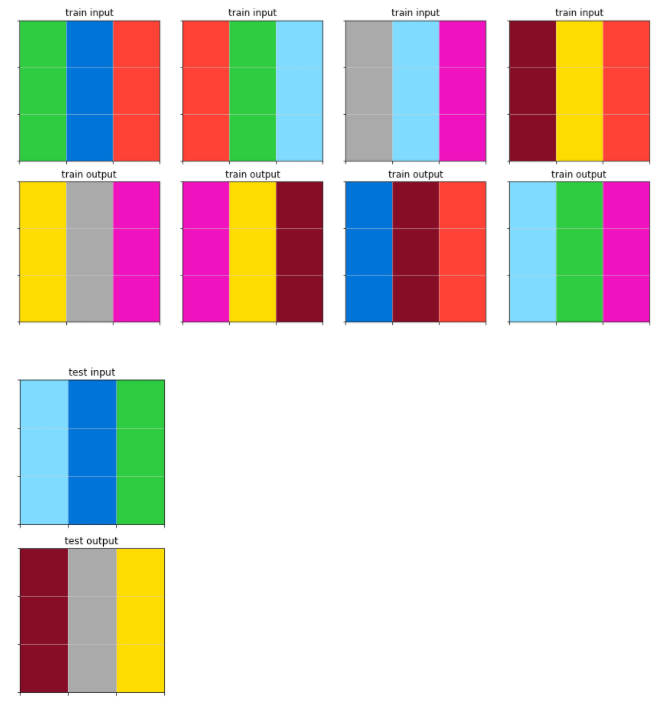

In [2]:
Image("C://Users/oisin/Documents/College/PTAI/Assignment 3/ARC/ob_work/test_train_plots/0d3d703e.PNG")

Below is what the data looks like in json format

In [3]:
with open("C://Users/oisin/Documents/College/PTAI/Assignment 3/ARC/data/training/0d3d703e.json") as f:
    data = json.load(f)

In [4]:
data

{'train': [{'input': [[3, 1, 2], [3, 1, 2], [3, 1, 2]],
   'output': [[4, 5, 6], [4, 5, 6], [4, 5, 6]]},
  {'input': [[2, 3, 8], [2, 3, 8], [2, 3, 8]],
   'output': [[6, 4, 9], [6, 4, 9], [6, 4, 9]]},
  {'input': [[5, 8, 6], [5, 8, 6], [5, 8, 6]],
   'output': [[1, 9, 2], [1, 9, 2], [1, 9, 2]]},
  {'input': [[9, 4, 2], [9, 4, 2], [9, 4, 2]],
   'output': [[8, 3, 6], [8, 3, 6], [8, 3, 6]]}],
 'test': [{'input': [[8, 1, 3], [8, 1, 3], [8, 1, 3]],
   'output': [[9, 5, 4], [9, 5, 4], [9, 5, 4]]}]}

Define rules:

- If 0 -> 0
- If 1 -> 5
- If 2 -> 6
- If 3 -> 4
- If 4 -> 3
- If 5 -> 1
- If 6 -> 2
- If 7 -> 7
- If 8 -> 9
- If 9 -> 8

In [5]:
train = data['train']
train = [i['input'] for i in train]
train = np.array(train)
# Get rid of the (1, 10, 10) shape and make it (10, 10) for each of the 3 inputs
train = np.squeeze(train)
train

array([[[3, 1, 2],
        [3, 1, 2],
        [3, 1, 2]],

       [[2, 3, 8],
        [2, 3, 8],
        [2, 3, 8]],

       [[5, 8, 6],
        [5, 8, 6],
        [5, 8, 6]],

       [[9, 4, 2],
        [9, 4, 2],
        [9, 4, 2]]])

In [6]:
test = data['test']
test = [i['input'] for i in test]
test = np.array(test)
# Get rid of the (1, 10, 10) shape and make it (10, 10)
test = (np.squeeze(test))
test

array([[8, 1, 3],
       [8, 1, 3],
       [8, 1, 3]])

New method: Use a dictionary mapping and vectorize the mappings based on the old array

In [7]:
def solve_0d3d703e(x):
    '''
    
    The goal of this task is to change a column from one colour (or number) to another based on a mapping grid. 
    This is accomplished here by first initialising a dictionary with all of our mappings. 
    The np.vectorize function is then used to create a new array based on our input array by using 
    a lambda function that utilises the mapping dict to change the input. This is returned to us then as a new numpy 2d array.
    
    Parameters:
    x: 2D numpy array
    
    >>> solve_0d3d703e(np.array([[9, 7, 2], [9, 7, 2], [9, 7, 2]]))
    array([[8, 7, 6],
           [8, 7, 6],
           [8, 7, 6]])
           
    >>> solve_0d3d703e(np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]))
    array([[5, 6, 4],
           [5, 6, 4],
           [5, 6, 4]])
    '''
    mappings = {0: 0, 1: 5, 2: 6, 3: 4, 4: 3, 5: 1, 6: 2, 7: 7, 8: 9, 9: 8}
    # If statement within lambda ensures that function doesn't fall if we get colours beyond 9 e.g 10
    # https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html
    new_x = np.vectorize(lambda y: mappings[y] if y in mappings else y)(x)
    return new_x

In [8]:
import doctest
doctest.testmod()

TestResults(failed=0, attempted=2)

In [9]:
[solve_0d3d703e(train[i]) for i in range(len(train))]

[array([[4, 5, 6],
        [4, 5, 6],
        [4, 5, 6]]),
 array([[6, 4, 9],
        [6, 4, 9],
        [6, 4, 9]]),
 array([[1, 9, 2],
        [1, 9, 2],
        [1, 9, 2]]),
 array([[8, 3, 6],
        [8, 3, 6],
        [8, 3, 6]])]

In [10]:
solve_0d3d703e(test)

array([[9, 5, 4],
       [9, 5, 4],
       [9, 5, 4]])

Have the correct answers now for all train and test!

In [11]:
solve_0d3d703e(np.array([[9, 7, 2], [9, 7, 2], [9, 7, 2]]))

array([[8, 7, 6],
       [8, 7, 6],
       [8, 7, 6]])

In [12]:
solve_0d3d703e(np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]))

array([[5, 6, 4],
       [5, 6, 4],
       [5, 6, 4]])